In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl as ql

In [2]:
%matplotlib inline

In [6]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

List of indicators used from quandl
1. Total Investment, % of GDP:	ODA/ZAF_NID_NGDP
2. GDP at Constant Prices, LCU Billions:	ODA_ZAF_NGDP_R
3. Current Account Balance, % of GDP:	ODA/ZAF_BCA_NGDPD
4. Inflation Index, End of Period Consumer Prices	ODA/ZAF_PCPIE
5. Banks - Money:	UIFS/BK_MON_ZAF
6. Bond Yields:	UIFS/YLD_ZAF

In [30]:
indicators = {
    'investments': 'ODA/ZAF_NID_NGDP',
    'GDP': 'ODA/ZAF_NGDP_R',
    'current_ac_bal': 'ODA/ZAF_BCA_NGDPD',
    'inflation_index': 'ODA/ZAF_PCPIE',
    'bond_yield': 'UIFS/YLD_ZAF',
    'banks_money': 'UIFS/BK_MON_ZAF'
}

In [31]:
start_dt = dt.date(1980, 1, 1)

In [7]:
ql.ApiConfig.api_key = 'P_Td-wJDfw1M8Yccxxqe'

In [32]:
'''Downloading data from Quandl: be sure to use your own API key'''
for key, value in enumerate(indicators.items()):
    globals()['{}'.format(value[0])] = ql.get(value[1], start_date=start_dt)

In [59]:
'''Concatnating each variable into a single dataframe'''
variables = pd.concat((investments, GDP, current_ac_bal, inflation_index, bond_yield, banks_money['M3 (RAND)']), axis=1)
variables.columns = indicators.keys()
variables.head()

,investments,GDP,current_ac_bal,inflation_index,bond_yield,banks_money
Date,,,,,,
1980-12-31,31.356,1404.900,3.961,4.7,10.0858,3.465500e+10
1981-12-31,34.115,1480.213,-6.018,5.3,12.9875,4.082740e+10
1982-12-31,26.529,1474.538,-4.364,6.0,13.5083,4.705630e+10
1983-12-31,27.173,1447.310,-0.462,6.7,12.6650,5.477880e+10
1984-12-31,25.543,1521.110,-2.422,7.5,15.2267,6.462610e+10


In [60]:
'''Standardizing each variable'''
variables[['investments', 'bond_yield', 'current_ac_bal']] = variables[['investments', 'bond_yield', 'current_ac_bal']].divide(100)
variables[['GDP', 'inflation_index', 'banks_money']] = variables[['GDP', 'inflation_index', 'banks_money']].pct_change()
variables = variables[1:]
variables.head()

,investments,GDP,current_ac_bal,inflation_index,bond_yield,banks_money
Date,,,,,,
1981-12-31,0.34115,0.053607,-0.06018,0.127660,0.129875,0.178110
1982-12-31,0.26529,-0.003834,-0.04364,0.132075,0.135083,0.152567
1983-12-31,0.27173,-0.018465,-0.00462,0.116667,0.126650,0.164112
1984-12-31,0.25543,0.050991,-0.02422,0.119403,0.152267,0.179765
1985-12-31,0.22050,-0.012115,0.03927,0.186667,0.167917,0.122652


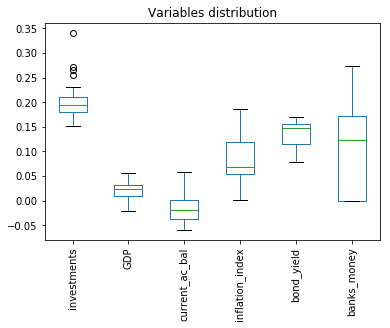

In [56]:
variables.plot.box();
# plt.legend(loc='best', title=None, frameon=False)
plt.title('Variables distribution')
plt.xticks(rotation=90)
plt.show()

In [64]:
'''Inputing missing values of bond_yield and bank_money from 2010 onwards'''
from statsmodels.tsa.stattools import adfuller

print('Results of dicky-fuller test:')
dftest = adfuller(variables.bond_yield.loc[:'2009'], autolag='AIC')
dfoutput = pd.Series(dftest[:4], index=['test stat', 'p-val', 'lags used', 'no. obs'])

# for key, value in dftest[4].items():
#     dfoutput['critical value (%)'% key] = value

Results of dicky-fuller test:


In [65]:
dfoutput

test stat    -0.324695
p-val         0.921933
lags used     0.000000
no. obs      28.000000
dtype: float64

With high p-value, we definitely fail to reject the $H_0$ that the series is stationary.

In [70]:
stat_by = variables.bond_yield.pct_change()[1:] # Creating a stationary time series by obtaining pct change.

In [71]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(stat_by, order=(2,2,1))
results_ARIMA= model.fit(disp=1)

In [ ]:
'''Performing PCA on the data'''

In [ ]:
'''Fitting a regression model to original data vs decomposed data'''